In [1]:
from random import uniform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
u1 = [uniform(0,1) for i in range(10000)]
u2 = [uniform(0,1) for i in range(10000)]
df = pd.DataFrame({"u1":u1, "u2":u2})
df

,u1,u2
0,0.655670,0.855881
1,0.405380,0.448803
2,0.228102,0.083886
3,0.762462,0.650291
4,0.742950,0.605154
...,...,...
9995,0.277681,0.902505
9996,0.410990,0.124015
9997,0.632472,0.442975
9998,0.195080,0.081209


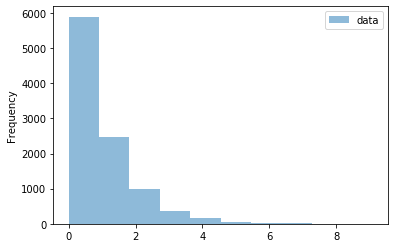

In [13]:
import numpy as np
df = pd.DataFrame({'data':[-np.log(x) for x in u1]})
df.iloc[1:].plot.hist(alpha=0.5)

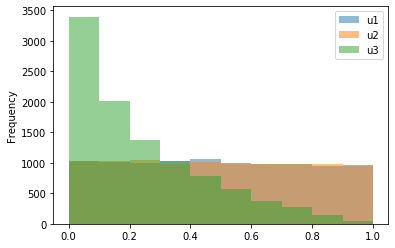

In [19]:
df = pd.DataFrame({'u1':u1,'u2':u2})
df['u3'] = df['u1']*df['u2']
(df).iloc[1:].plot.hist(alpha=0.5)

In [13]:
df["U"] = df["u1"] + df["u2"]


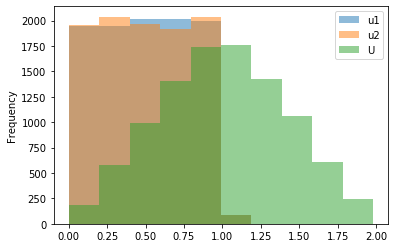

In [14]:
df.plot.hist(alpha=0.5)

In [3]:
import numpy as np
np.random.normal(loc=900, scale=1.0, size=None)

901.847108553054

In [4]:
from scipy.stats import norm

In [35]:
rng = 10000
X = np.random.normal(loc=0, scale=1.0, size=rng)
r = [np.random.choice(X) for i in range(rng)]

In [42]:
U = [norm.cdf(i) for i in X]

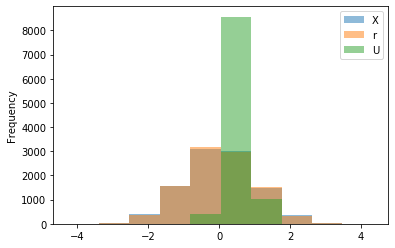

In [43]:
df = pd.DataFrame({"X":X,"r":r,"U":U})
df.plot.hist(alpha=.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf7b42c4d0>,
      dtype=object)

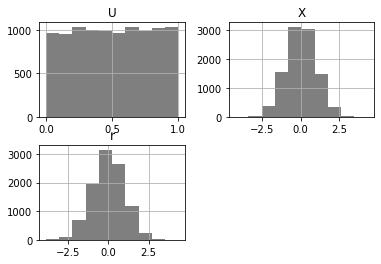

In [44]:
df.hist(color='k', alpha=0.5)

In [25]:
a = np.array([[2,-1], [-1,4]])
C = np.linalg.cholesky(a)
np.dot(C,C.T)

array([[ 2., -1.],
       [-1.,  4.]])

In [64]:

P = np.array([[.8,.2],[.4,.6]])
wed = np.zeros(5000)
for d in range(5000):
    w = np.zeros(100000)
    for i in range(100000):
        state = 0
        for u in range(2):
            p = P[state,0]
            u_i = uniform(0,1)
            if u_i > p:
                if state == 0:
                    state = 1
                elif state == 1:
                    state = 0
        w[i] = state

    wed[d] = (len(w) - w.sum())/len(w)    
wed.mean()   

0.7600102120000001

In [59]:
w[:10]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [77]:
y_2 = np.zeros(10000)
y_5 = np.zeros(10000)

for idx in range(10000):
    y = np.random.normal(loc=0, scale=1, size=None)
    for i in range(6):
        e = np.random.normal(loc=0, scale=.51**.5, size=None)
        y = .7*y + e
        if i == 2:
            y_2[idx] = y
        if i == 5:
            y_5[idx] = y
             
np.cov(y_2,y_5)    

array([[0.98962582, 0.34780777],
       [0.34780777, 1.02585661]])

In [78]:
np.var(y_5)

1.0257540253942135

In [79]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [83]:
w3=brownian(x0=0, n=100, dt=3, delta=1, out=None)
w5 = brownian(x0=0, n=100, dt=5, delta=1, out=None)
np.cov(w3,w5)

array([[46.58627615, 19.4093902 ],
       [19.4093902 , 37.43425035]])

In [84]:
df = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/1avGWWl1J19O_Zm0NGTGy2E-fOG05i4ljRfjl87P7FiA/edit?ts=5e5e9222#gid=0")


ParserError: Error tokenizing data. C error: Expected 6 fields in line 93, saw 558


In [1]:
import numpy as np

np.random.exponential(1/8)

0.3350960359874167

In [3]:
np.var([-3,-2,-1,0,1,2,3])

4.0

In [ ]:
""" bank07: One Counter,random arrivals """
from SimPy.Simulation import *
from random import expovariate, seed

## Model components ------------------------

class Source(Process):
    """ Source generates customers randomly """

    def generate(self,number,meanTBA,resource):     
        for i in range(number):
            c = Customer(name = "Customer%02d"%(i,))
            activate(c,c.visit(timeInBank=12.0,
                               res=resource))          
            t = expovariate(1.0/meanTBA)
            yield hold,self,t

class Customer(Process):
    """ Customer arrives, is served and  leaves """
        
    def visit(self,timeInBank,res):       
        arrive = now()       # arrival time        
        print "%8.3f %s: Here I am     "%(now(),self.name)

        yield request,self,res                       
        wait = now()-arrive  # waiting time        
        print "%8.3f %s: Waited %6.3f"%(now(),self.name,wait)
        yield hold,self,timeInBank               
        yield release,self,res                     
        
        print "%8.3f %s: Finished      "%(now(),self.name)

## Experiment data -------------------------

maxNumber = 5                                      
maxTime = 400.0  # minutes                                
ARRint = 10.0    # mean, minutes
k = Resource(name="Counter",unitName="Clerk")     

## Model/Experiment ------------------------------
seed(99999)
initialize()
s = Source('Source')
activate(s,s.generate(number=maxNumber,            
                      meanTBA=ARRint, resource=k),at=0.0)        
simulate(until=maxTime)

In [5]:
import random
import urllib.request
def download_web_image(url):
    name = random.randrange(1, 1000)
    full_name = str(name) + ".jpg"
    urllib.request.urlretrieve(url, full_name)
download_web_image("https://avatars2.githubusercontent.com/u/8547538?s=460&u=8a4be84ff4870a332fe94c11fca02b432fb9f83e&v=4") 

In [25]:
import pandas as pd
index = pd.date_range('2013-08-14 22:15:00', periods=1000, freq='S')
df = pd.DataFrame(data=range(1000), index=index)
loffset='1H1S'

In [30]:
df.resample('10Min',loffset='5min').mean()

,0
2013-08-14 22:15:00,149.5
2013-08-14 22:25:00,599.5
2013-08-14 22:35:00,949.5


In [31]:
d= {"type":"LineString","coordinates":[[77.29,29.07],[77.42,29.26],[77.27,29.31],[77.29,29.07]]}

In [35]:
d= {"type":"LineString","coordinates":[[77.29,29.07],[77.42,29.26],[77.27,29.31],[77.29,29.07]]}
def coords_to_dict(coords):
    new_coords = []
    for c in coords:
        x,y = c
        new_coords.append({"x":x, "y":y})
        
    return new_coords
new_coords =coords_to_dict(d["coordinates"])
d["coordinates"] = new_coords
        

In [36]:
d

{'type': 'LineString',
 'coordinates': [{'x': 77.29, 'y': 29.07},
  {'x': 77.42, 'y': 29.26},
  {'x': 77.27, 'y': 29.31},
  {'x': 77.29, 'y': 29.07}]}